<a href="https://colab.research.google.com/github/Sreraj/project/blob/main/Codsoft_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TASK 1  :  CREDICT CARD FRAUD DETECTION***

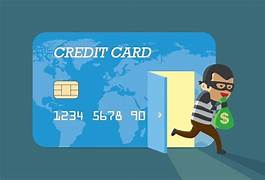

In [1]:
from IPython.display import Image,display
display(Image("/content/credit card.jpeg" , width=700 ,height = 400))

## Import Neccessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
# Loading the dataset

train = pd.read_csv("/content/fraudTrain.csv")
test = pd.read_csv("/content/fraudTest.csv")

In [4]:
# top 5 rows
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [5]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46718 entries, 0 to 46717
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             46718 non-null  int64  
 1   trans_date_trans_time  46717 non-null  object 
 2   cc_num                 46717 non-null  float64
 3   merchant               46717 non-null  object 
 4   category               46717 non-null  object 
 5   amt                    46717 non-null  float64
 6   first                  46717 non-null  object 
 7   last                   46717 non-null  object 
 8   gender                 46717 non-null  object 
 9   street                 46717 non-null  object 
 10  city                   46717 non-null  object 
 11  state                  46717 non-null  object 
 12  zip                    46717 non-null  float64
 13  lat                    46717 non-null  float64
 14  long                   46717 non-null  float64
 15  ci

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70004 entries, 0 to 70003
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             70004 non-null  int64  
 1   trans_date_trans_time  70004 non-null  object 
 2   cc_num                 70004 non-null  int64  
 3   merchant               70003 non-null  object 
 4   category               70003 non-null  object 
 5   amt                    70003 non-null  float64
 6   first                  70003 non-null  object 
 7   last                   70003 non-null  object 
 8   gender                 70003 non-null  object 
 9   street                 70003 non-null  object 
 10  city                   70003 non-null  object 
 11  state                  70003 non-null  object 
 12  zip                    70003 non-null  float64
 13  lat                    70003 non-null  float64
 14  long                   70003 non-null  float64
 15  ci

In [8]:
# Combine train and test data
df = pd.concat([train,test],ignore_index=True)
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116717,69999,2020-07-14 23:49:15,2.233883e+15,fraud_Jast and Sons,food_dining,73.35,Jamie,Robinson,F,67089 Caitlin Meadow Apt. 905,...,33.3570,-89.0473,1923.0,Medical physicist,1960-01-16,6ed12635fff611348c7944c54ab531f6,1.373846e+09,32.835536,-89.617104,0.0
116718,70000,2020-07-14 23:49:24,6.544734e+15,fraud_Abbott-Rogahn,entertainment,2.23,John,Myers,M,701 Wilson Divide,...,41.5500,-87.4569,23727.0,Community arts worker,1982-02-08,114c921821db35f9880c27055202355b,1.373846e+09,40.610230,-86.580900,0.0
116719,70001,2020-07-14 23:49:44,1.800482e+14,fraud_Berge-Ullrich,home,28.24,Mary,Wall,F,2481 Mills Lock,...,40.6152,-74.4150,71485.0,Leisure centre manager,1974-07-19,64508ab2649bb3980402db07ea9fbb5c,1.373846e+09,40.603615,-75.056870,0.0
116720,70002,2020-07-14 23:50:14,4.777065e+15,"fraud_Prosacco, Kreiger and Kovacek",home,82.71,Peter,Caldwell,M,08966 Beltran Route Suite 905,...,40.1334,-75.4536,737.0,Oceanographer,1987-04-24,04eb83447c2f77308f3096981bee7640,1.373846e+09,40.777796,-75.875785,0.0


In [9]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [10]:
# Drop Unwanted Columns

df.drop(['Unnamed: 0','cc_num','merchant','trans_date_trans_time','first','last','dob'],axis=1,inplace = True)
df

,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654.0,36.0788,-81.1781,3495.0,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160.0,48.8878,-118.2105,149.0,Special educational needs teacher,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252.0,42.1808,-112.2620,4154.0,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632.0,46.2306,-112.1138,1939.0,Patent attorney,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433.0,38.4207,-79.4629,99.0,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116717,food_dining,73.35,F,67089 Caitlin Meadow Apt. 905,Sturgis,MS,39769.0,33.3570,-89.0473,1923.0,Medical physicist,6ed12635fff611348c7944c54ab531f6,1.373846e+09,32.835536,-89.617104,0.0
116718,entertainment,2.23,M,701 Wilson Divide,Highland,IN,46322.0,41.5500,-87.4569,23727.0,Community arts worker,114c921821db35f9880c27055202355b,1.373846e+09,40.610230,-86.580900,0.0
116719,home,28.24,F,2481 Mills Lock,Plainfield,NJ,7060.0,40.6152,-74.4150,71485.0,Leisure centre manager,64508ab2649bb3980402db07ea9fbb5c,1.373846e+09,40.603615,-75.056870,0.0
116720,home,82.71,M,08966 Beltran Route Suite 905,Oaks,PA,19456.0,40.1334,-75.4536,737.0,Oceanographer,04eb83447c2f77308f3096981bee7640,1.373846e+09,40.777796,-75.875785,0.0


In [11]:
# Check duplicated values
df.duplicated().sum()

1

In [12]:
# Check the null values
df.isna().sum()

,0
category,2
amt,2
gender,2
street,2
city,2
state,2
zip,2
lat,2
long,2
city_pop,2


In [13]:
# Delete null values
df.dropna(inplace=True)

In [14]:
# Check the datatype
df.dtypes

,0
category,object
amt,float64
gender,object
street,object
city,object
state,object
zip,float64
lat,float64
long,float64
city_pop,float64


# EDA

Text(0.5, 1.0, 'Count of Gender')

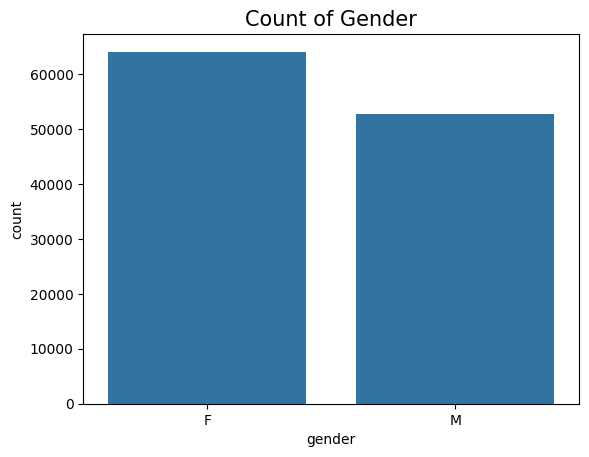

In [15]:
# Countplot of Gender
a=sns.countplot(x="gender",data=df)
plt.title("Count of Gender",size=15)



*   Most of the transactions are done by females







Text(0.5, 1.0, 'Count of Category')

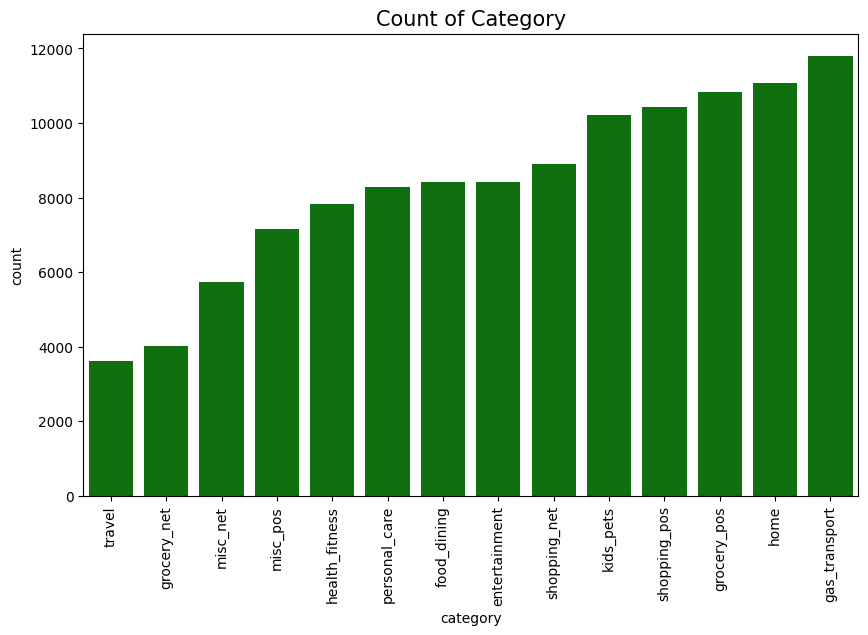

In [16]:
# Countplot of Category
plt.figure(figsize=(10,6))
sorted = df['category'].value_counts(ascending=True).index
a = sns.countplot(x="category",data=df,order = sorted,color='g')
plt.xticks(rotation=90)
plt.title("Count of Category",size=15)



*   gas_transport is the category with the highest transactions
*   travel is the  category with the least transactions



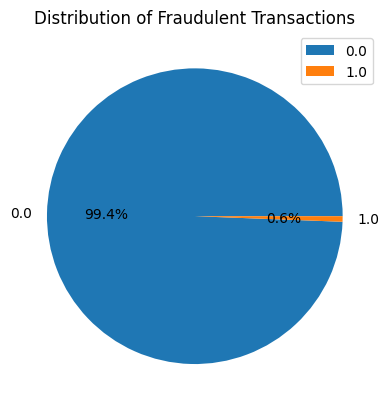

In [17]:
# Distribution of Fraudelent Transactions
fraud = df['is_fraud'].value_counts()
labels = fraud.index
sizes = fraud.values

plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.title('Distribution of Fraudulent Transactions')
plt.legend()
plt.show()



*   This is a imbalanced data ,so we should balance it using over sampling or under sampling method




Encoding Categorical data into numerical data

In [18]:
# Encoding
encode = LabelEncoder()

for i in df.select_dtypes(include=['object']).columns:
    df[i] = encode.fit_transform(df[i])
df

,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,8,4.97,0,530,494,26,28654.0,36.0788,-81.1781,3495.0,357,5059,1.325376e+09,36.011293,-82.048315,0.0
1,4,107.23,0,410,569,46,99160.0,48.8878,-118.2105,149.0,412,14285,1.325376e+09,49.159047,-118.186462,0.0
2,0,220.11,1,563,440,12,83252.0,42.1808,-112.2620,4154.0,295,73752,1.325376e+09,43.150704,-112.154481,0.0
3,2,45.00,1,864,81,25,59632.0,46.2306,-112.1138,1939.0,316,49062,1.325376e+09,47.034331,-112.561071,0.0
4,9,41.96,1,395,203,44,24433.0,38.4207,-79.4629,99.0,110,74860,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116716,11,1.83,0,447,530,4,91321.0,34.3795,-118.5230,34882.0,210,27614,1.373846e+09,33.678463,-118.637084,0.0
116717,1,73.35,0,627,733,24,39769.0,33.3570,-89.0473,1923.0,278,50563,1.373846e+09,32.835536,-89.617104,0.0
116718,0,2.23,1,653,328,14,46322.0,41.5500,-87.4569,23727.0,92,7867,1.373846e+09,40.610230,-86.580900,0.0
116719,6,28.24,0,227,603,30,7060.0,40.6152,-74.4150,71485.0,256,45676,1.373846e+09,40.603615,-75.056870,0.0


In [19]:
# Splitting input and Output Datas

x = df.drop('is_fraud',axis=1)
y = df['is_fraud']

In [20]:
# Over Sampling data due to class imbalance

from imblearn.over_sampling import SMOTE
smo = SMOTE()
x_smo, y_smo = smo.fit_resample(x,y)

In [21]:
y_smo.value_counts()

,count
is_fraud,
0.0,116017
1.0,116017


In [22]:
# Train Test Split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smo,y_smo,test_size=0.30,random_state=42)

In [23]:
# Normalization
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
# Model Creation

lr = LogisticRegression(random_state = 42)
dt = DecisionTreeClassifier(random_state =42)
rf = RandomForestClassifier(n_estimators=100 , max_depth = 20, n_jobs =1, random_state = 42)

model = [lr,dt,rf]
for i in model:
  print("Model is :",i)
  print(".................")
  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)
  print("Accuracy_Score : " ,accuracy_score(y_test,y_pred))
  print("Confusion_Matrix : ",confusion_matrix(y_test,y_pred))
  print("Classification_Report : ",classification_report(y_test,y_pred))
  print("-"*200)

Model is : LogisticRegression(random_state=42)
.................
Accuracy_Score :  0.8808952608064817
Confusion_Matrix :  [[32306  2332]
 [ 5959 29014]]
Classification_Report :                precision    recall  f1-score   support

         0.0       0.84      0.93      0.89     34638
         1.0       0.93      0.83      0.87     34973

    accuracy                           0.88     69611
   macro avg       0.88      0.88      0.88     69611
weighted avg       0.89      0.88      0.88     69611

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Model is : DecisionTreeClassifier(random_state=42)
.................
Accuracy_Score :  0.9919696599675338
Confusion_Matrix :  [[34229   409]
 [  150 34823]]
Classification_Report :                precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     34638
   

In [25]:
result = {'Algorithm':['Logistic Regression','Decision Tree','Random Forest'],"Accuracy":['88.5 %','98.7 %','98.2 %']}
result = pd.DataFrame(result)
result

,Algorithm,Accuracy
0,Logistic Regression,88.5 %
1,Decision Tree,98.7 %
2,Random Forest,98.2 %
